Import `Keras` and relative modules.

In [98]:
import numpy as np
import pandas as pd
from keras import utils

np.random.seed(10)

In [99]:
from keras._tf_keras.keras.datasets import mnist

## Download MNIST dataset for the first time.
Download at `~/.keras`

In [100]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [101]:
print("train data = ", len(x_train_image))
print("test data = ", len(x_test_image))

train data =  60000
test data =  10000


In [102]:
print("x_train_image: ", x_train_image.shape)
print("y_train_label: ", y_train_label.shape)

x_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


Define `plot_image` to display images.

## Retrieve training data

In [103]:
import matplotlib.pyplot as plt


def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap="binary")
    plt.show()

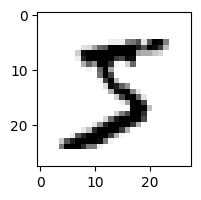

In [104]:
plot_image(x_train_image[0])

In [105]:
y_train_label[0]

5

## Retrieve multiple training data images and labels

In [106]:
import matplotlib.pyplot as plt


def plot_images_labels_prediction(image, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(image[idx], cmap="binary")
        title = "label = " + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

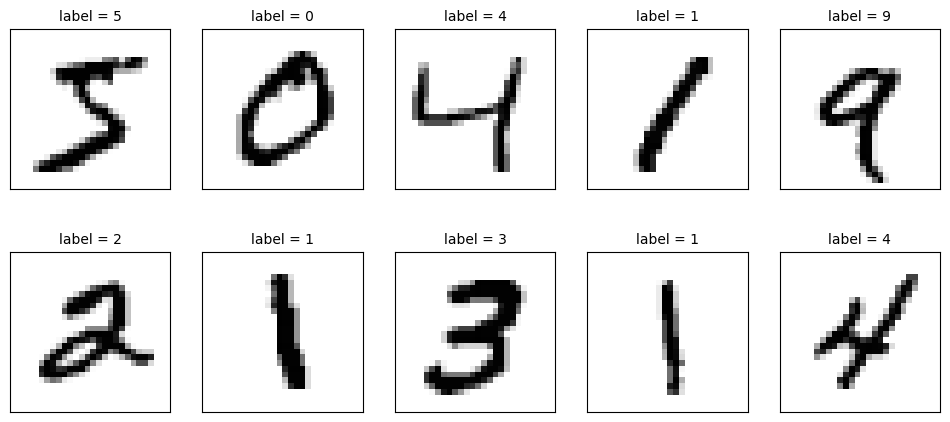

In [107]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

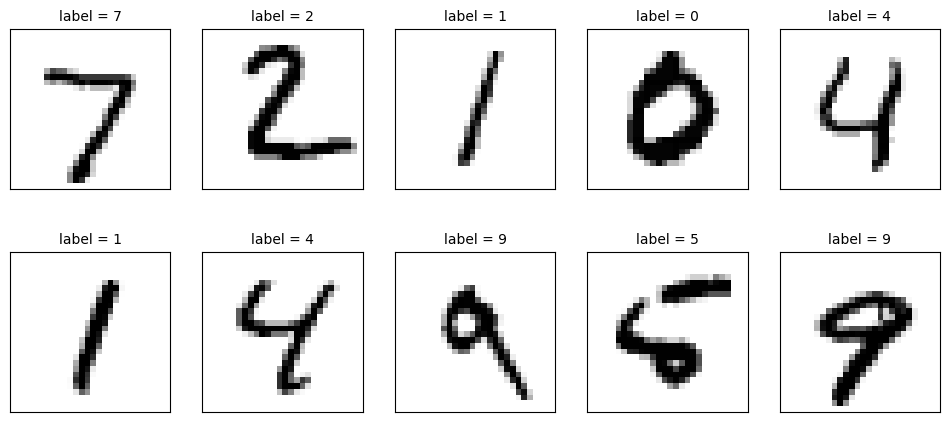

In [108]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

## Multilayer Perceptron model data preprocess

## features data preprocess

In [109]:
print("x_train_image: ", x_train_image.shape)
print("y_train_label: ", y_train_label.shape)


x_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


In [110]:
x_Train = x_train_image.reshape(60000, 784).astype("float32")
x_Test = x_test_image.reshape(10000, 784).astype("float32")

In [111]:
print("x_train: ", x_Train.shape)
print("x_test: ", x_Test.shape)


x_train:  (60000, 784)
x_test:  (10000, 784)


In [112]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [113]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255


In [114]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## label data preprocess

In [115]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [116]:
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

In [117]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Build a model

In [118]:
from keras.src.models import Sequential
from keras.src.layers import Dense, Input

In [119]:
model = Sequential()

In [120]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))

`unit=256` defines "hidden layer" that has 256 neural.
`input_dim=784` because 28*28 image is 784 floats after it converted to single dimension.

In [121]:
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))

In [122]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

输入层与隐藏层的公式:

$h1 = relu(X * W1 + b1)$

隐藏层与输出层的公式:

$y = softmax(h1 * W2 + b2)$

所以每一层的Param计算方式如下:

$Param = (上一层神经元数量) * (本层神经元数量) + (本层神经元数量)$

## Start Training

In [123]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

`cross_entropy`交叉熵训练效果比较好

`adma`优化器可以让训练更快收敛

`metrics`设置评估模型的方式是准确率

In [130]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Epoch 1/10
240/240 - 1s - 2ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9784 - val_loss: 0.0979
Epoch 2/10
240/240 - 1s - 2ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9799 - val_loss: 0.0953
Epoch 3/10
240/240 - 1s - 3ms/step - accuracy: 1.0000 - loss: 7.3025e-04 - val_accuracy: 0.9798 - val_loss: 0.0958
Epoch 4/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 5.9388e-04 - val_accuracy: 0.9797 - val_loss: 0.0969
Epoch 5/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 5.1647e-04 - val_accuracy: 0.9802 - val_loss: 0.0977
Epoch 6/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 4.6259e-04 - val_accuracy: 0.9807 - val_loss: 0.0979
Epoch 7/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 4.2154e-04 - val_accuracy: 0.9804 - val_loss: 0.0980
Epoch 8/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 3.8396e-04 - val_accuracy: 0.9802 - val_loss: 0.0991
Epoch 9/10
240/240 - 1s - 2ms/step - accuracy: 1.0000 - loss: 3.5355e-04 - val_accuracy:

`verbose=2`显示训练过程

In [131]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

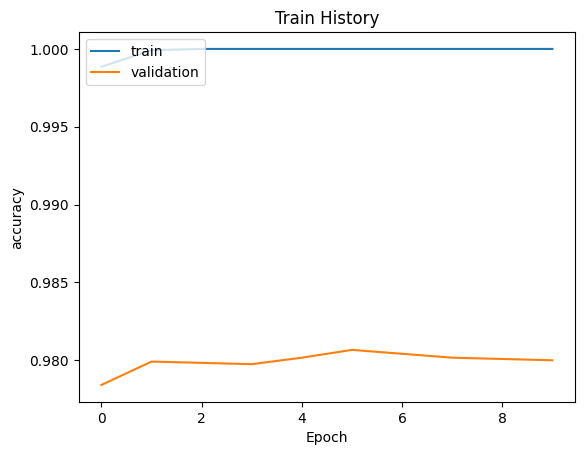

In [132]:
show_train_history(train_history, "accuracy", "val_accuracy")

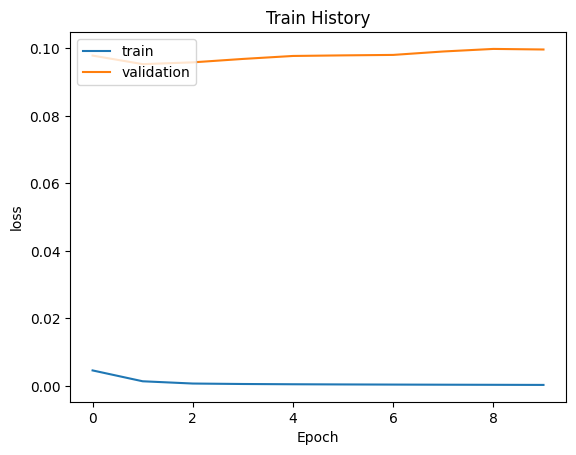

In [133]:
show_train_history(train_history, "loss", "val_loss")


In [135]:
score = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print(f"accuracy = {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9774 - loss: 0.1031

accuracy = 0.9800999760627747


进行预测

In [141]:
predictions = model.predict(x_Test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


In [143]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

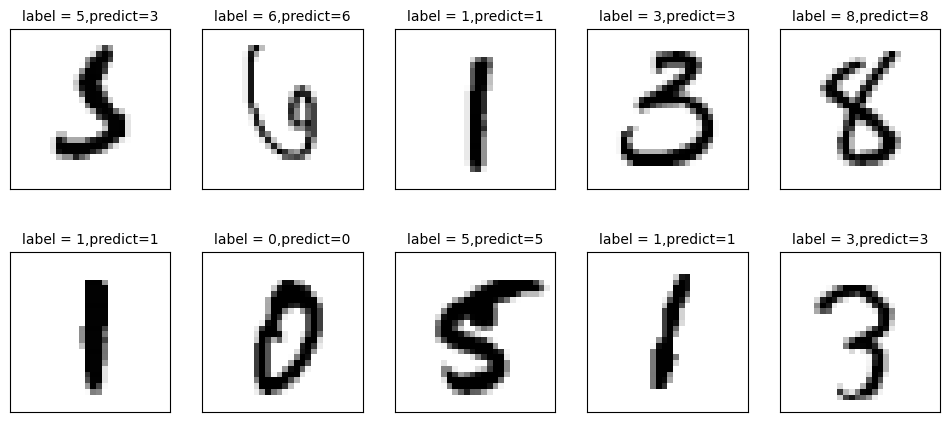

In [144]:
plot_images_labels_prediction(x_test_image, y_test_label, predicted_classes, idx=340)

显示混淆矩阵

In [145]:
pd.crosstab(y_test_label, predicted_classes, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,1,0,2,1,1,1
1,0,1127,3,2,0,1,2,0,0,0
2,5,1,1006,3,1,0,3,6,6,1
3,1,0,2,997,0,1,0,3,3,3
4,3,0,2,0,958,1,5,1,0,12
5,3,2,0,11,1,865,4,0,2,4
6,3,3,2,1,4,5,940,0,0,0
7,0,5,8,3,0,0,0,1007,0,5
8,1,1,3,9,3,4,3,5,941,4


In [146]:
df = pd.DataFrame({"label": y_test_label, "predict": predicted_classes})
df[:2]

,label,predict
0,7,7
1,2,2


In [147]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2810,5,3
3902,5,3
4355,5,3
5937,5,3
5972,5,3
8502,5,3


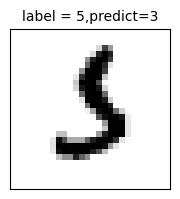

In [148]:
plot_images_labels_prediction(x_test_image, y_test_label, predicted_classes, idx=340, num=1)

隐藏层增加为1000个神经元

In [149]:
model = Sequential()

In [150]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))

/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/tensorflow-plus-keras-PjLLcQ39-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))

In [152]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [157]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Epoch 1/10
240/240 - 2s - 7ms/step - accuracy: 0.9158 - loss: 0.2917 - val_accuracy: 0.9606 - val_loss: 0.1483
Epoch 2/10
240/240 - 1s - 6ms/step - accuracy: 0.9672 - loss: 0.1148 - val_accuracy: 0.9679 - val_loss: 0.1084
Epoch 3/10
240/240 - 1s - 6ms/step - accuracy: 0.9794 - loss: 0.0737 - val_accuracy: 0.9700 - val_loss: 0.1010
Epoch 4/10
240/240 - 1s - 6ms/step - accuracy: 0.9871 - loss: 0.0490 - val_accuracy: 0.9738 - val_loss: 0.0875
Epoch 5/10
240/240 - 1s - 6ms/step - accuracy: 0.9904 - loss: 0.0358 - val_accuracy: 0.9774 - val_loss: 0.0741
Epoch 6/10
240/240 - 1s - 6ms/step - accuracy: 0.9935 - loss: 0.0253 - val_accuracy: 0.9789 - val_loss: 0.0726
Epoch 7/10
240/240 - 1s - 6ms/step - accuracy: 0.9960 - loss: 0.0177 - val_accuracy: 0.9803 - val_loss: 0.0703
Epoch 8/10
240/240 - 1s - 6ms/step - accuracy: 0.9980 - loss: 0.0121 - val_accuracy: 0.9760 - val_loss: 0.0824
Epoch 9/10
240/240 - 1s - 6ms/step - accuracy: 0.9985 - loss: 0.0087 - val_accuracy: 0.9790 - val_loss: 0.0745
E

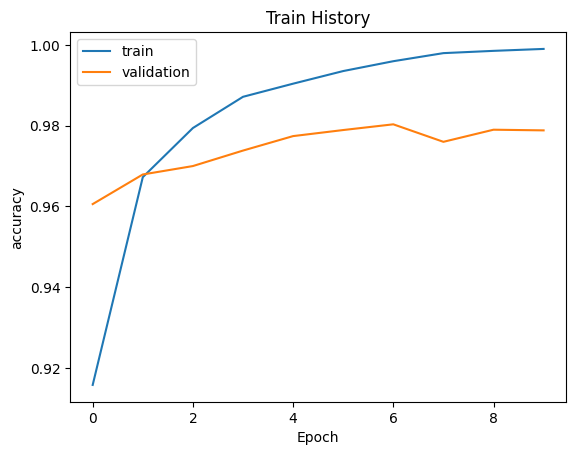

In [158]:
show_train_history(train_history, "accuracy", "val_accuracy")

In [159]:
score = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print(f"accuracy = {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9797 - loss: 0.0700

accuracy = 0.9825000166893005


## MLP 加入 DropOut 功能以避免 overfitting

In [163]:
from keras.src.layers import Dropout

model = Sequential()

In [164]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))

/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/tensorflow-plus-keras-PjLLcQ39-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.add(Dropout(0.5))

In [166]:
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))

In [167]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [168]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [169]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Epoch 1/10
240/240 - 2s - 9ms/step - accuracy: 0.8949 - loss: 0.3509 - val_accuracy: 0.9553 - val_loss: 0.1566
Epoch 2/10
240/240 - 1s - 6ms/step - accuracy: 0.9534 - loss: 0.1577 - val_accuracy: 0.9646 - val_loss: 0.1211
Epoch 3/10
240/240 - 2s - 6ms/step - accuracy: 0.9676 - loss: 0.1121 - val_accuracy: 0.9727 - val_loss: 0.0975
Epoch 4/10
240/240 - 2s - 7ms/step - accuracy: 0.9727 - loss: 0.0893 - val_accuracy: 0.9751 - val_loss: 0.0844
Epoch 5/10
240/240 - 2s - 7ms/step - accuracy: 0.9777 - loss: 0.0743 - val_accuracy: 0.9739 - val_loss: 0.0845
Epoch 6/10
240/240 - 2s - 7ms/step - accuracy: 0.9812 - loss: 0.0622 - val_accuracy: 0.9775 - val_loss: 0.0771
Epoch 7/10
240/240 - 2s - 7ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9772 - val_loss: 0.0736
Epoch 8/10
240/240 - 2s - 7ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9790 - val_loss: 0.0693
Epoch 9/10
240/240 - 1s - 6ms/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9798 - val_loss: 0.0683
E

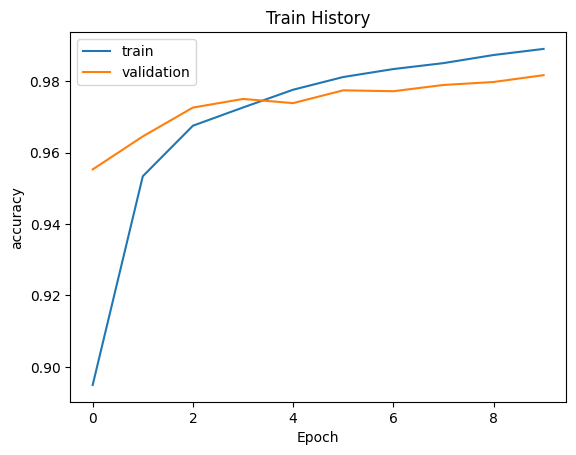

In [170]:
show_train_history(train_history, "accuracy", "val_accuracy")

In [171]:
score = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print(f"accuracy = {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9783 - loss: 0.0706

accuracy = 0.9807000160217285


## 建立 MLP 包含两个 hidden layer

In [180]:
from keras.src.layers import Dropout

In [181]:
model = Sequential()

In [182]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
model.add(Dropout(0.5))

/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/tensorflow-plus-keras-PjLLcQ39-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer="normal",
                activation="relu"))
model.add(Dropout(0.5))

/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/tensorflow-plus-keras-PjLLcQ39-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:
model.add(Dense(units=10,
                kernel_initializer="normal",
                activation="softmax"))


In [185]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,796,010 (6.85 MB)

 Trainable params: 1,796,010 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [187]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Epoch 1/10
240/240 - 4s - 17ms/step - accuracy: 0.8848 - loss: 0.3693 - val_accuracy: 0.9595 - val_loss: 0.1340
Epoch 2/10
240/240 - 4s - 15ms/step - accuracy: 0.9515 - loss: 0.1607 - val_accuracy: 0.9693 - val_loss: 0.1056
Epoch 3/10
240/240 - 4s - 15ms/step - accuracy: 0.9639 - loss: 0.1183 - val_accuracy: 0.9734 - val_loss: 0.0886
Epoch 4/10
240/240 - 4s - 15ms/step - accuracy: 0.9700 - loss: 0.1000 - val_accuracy: 0.9753 - val_loss: 0.0817
Epoch 5/10
240/240 - 4s - 15ms/step - accuracy: 0.9739 - loss: 0.0845 - val_accuracy: 0.9768 - val_loss: 0.0784
Epoch 6/10
240/240 - 4s - 16ms/step - accuracy: 0.9769 - loss: 0.0730 - val_accuracy: 0.9778 - val_loss: 0.0756
Epoch 7/10
240/240 - 3s - 14ms/step - accuracy: 0.9785 - loss: 0.0676 - val_accuracy: 0.9763 - val_loss: 0.0788
Epoch 8/10
240/240 - 4s - 16ms/step - accuracy: 0.9809 - loss: 0.0596 - val_accuracy: 0.9780 - val_loss: 0.0738
Epoch 9/10
240/240 - 4s - 17ms/step - accuracy: 0.9820 - loss: 0.0553 - val_accuracy: 0.9787 - val_loss:

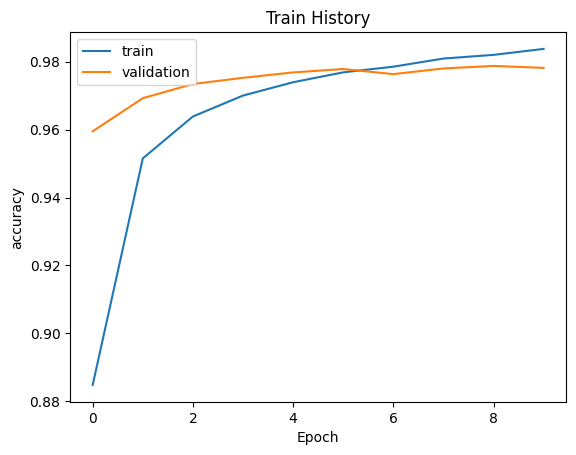

In [188]:
show_train_history(train_history, "accuracy", "val_accuracy")

In [191]:
score = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print(f"accuracy = {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0771

accuracy = 0.9818000197410583
